Design and implement a CNN model to classify multi category tiff 
images with tensorflow /keras 

In [40]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt

In [33]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [34]:
print(f"First label in y_train: {y_train[0]}")
print(f"First image shape in x_train: {x_train[0].shape}")


First label in y_train: [6]
First image shape in x_train: (32, 32, 3)


In [36]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32') /255.0

In [37]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [38]:
model = models.Sequential([
    layers.Conv2D(32,(3,3), activation ='relu',input_shape =(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=2, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 52ms/step - accuracy: 0.3068 - loss: 1.8607 - val_accuracy: 0.5068 - val_loss: 1.3653
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.5274 - loss: 1.3254 - val_accuracy: 0.5738 - val_loss: 1.1877
313/313 - 4s - 11ms/step - accuracy: 0.5738 - loss: 1.1877
Test accuracy: 0.5738000273704529


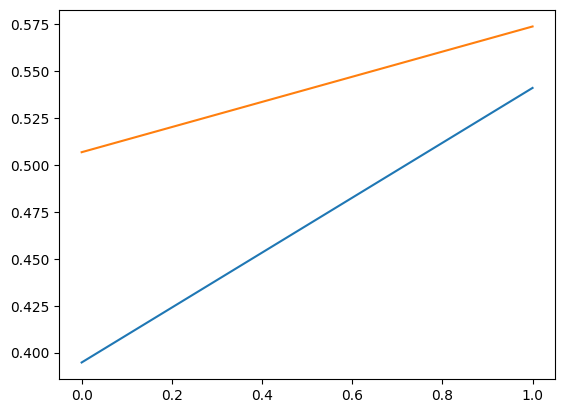

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

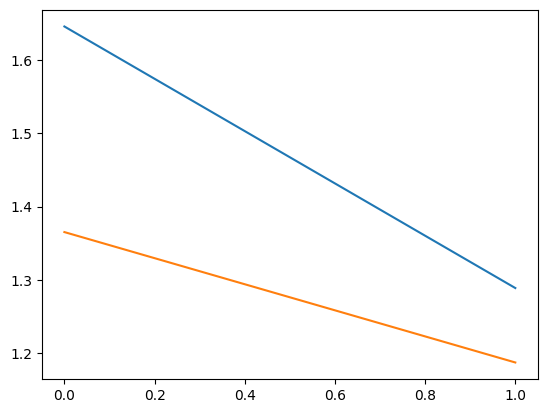

In [43]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')